<font size="+5">#08. Hyperparameter Tuning with Cross Validation</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Load the Data

> - We take some dataset from the _[Machine Learning Data Repository UCI](https://archive.ics.uci.edu/ml/datasets/adult)_
> - The aim is to predict weather a **person** (rows) `earned>50k` a year or not
> - Based on their **social-demographic features** (columns)

Esta tabla resume la información de personas que ganan más de 50,000 al año o menos. Por tanto, nuestro objetivo es desarrollar un modelo que calcule mejor si una persona gana por encima o por debajo de dicho umbral. La columna a predecir es la última.
>
> PD: You may see the column names & meanings [here ↗](https://archive.ics.uci.edu/ml/datasets/adult).

In [15]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header=None, na_values=' ?')
df.rename(columns={14: 'target'}, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Feature Selection

> 1. Class/Labels/Dependent/`Target` `y`
> 2. Independents/Features/Characteristics/`Explanatory` `X`

In [16]:
df.isna().sum()

0            0
1         1836
2            0
3            0
4            0
5            0
6         1843
7            0
8            0
9            0
10           0
11           0
12           0
13         583
target       0
dtype: int64

In [17]:
df = df.dropna(axis=0)

In [18]:
df.isna().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
target    0
dtype: int64

In [19]:
df = pd.get_dummies(df, drop_first=True)

In [20]:
df

,0,2,4,10,11,12,1_ Local-gov,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,6_ Other-service,6_ Priv-house-serv,6_ Prof-specialty,6_ Protective-serv,6_ Sales,6_ Tech-support,6_ Transport-moving,7_ Not-in-family,7_ Other-relative,7_ Own-child,7_ Unmarried,7_ Wife,8_ Asian-Pac-Islander,8_ Black,8_ Other,8_ White,9_ Male,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia,target_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [21]:
X = df.drop(columns='target_ >50K')

In [22]:
y = df[['target_ >50K']]

# Data Preprocessing

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.flatten(), test_size=0.30, random_state=42)

# `DecisionTreeClassifier()` with Default Hyperparameters

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt = DecisionTreeClassifier()

In [15]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
dt.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

## Accuracy

> - `model.score()`
>
> In `train` data

In [17]:
dt.score(X_train, y_train)

1.0

> In `test` data

In [18]:
dt.score(X_test, y_test)

0.8108078240689579

## Model Visualization

> - We'll use `plot_tree()`, located within `tree` module from `sklearn` library
> - You may use `shift + tab` to ask `Python` how the function `plot_tree()` works

In [19]:
from sklearn import tree
from sklearn.tree import plot_tree

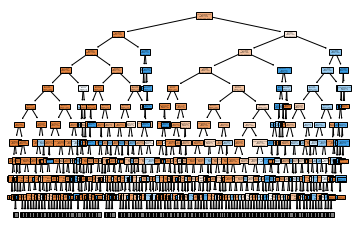

In [20]:
plot_tree(decision_tree=dt, feature_names=X.columns, filled=True, max_depth=10);

## Interpretation

> - Why the difference on accuracy is so much?

# `DecisionTreeClassifier()` with Custom Hyperparameters

> - The `model` has this hyperparameters ↓

In [21]:
model = DecisionTreeClassifier()

In [22]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## 1st Configuration

In [23]:
model = DecisionTreeClassifier(max_depth=3)

In [24]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Accuracy

> In `train` data

In [25]:
model.score(X_train, y_train)

0.8400985175010657

> In `test` data

In [26]:
model.score(X_test, y_test)

0.8406453751795778

### Model Visualization

> - `plot_tree()`

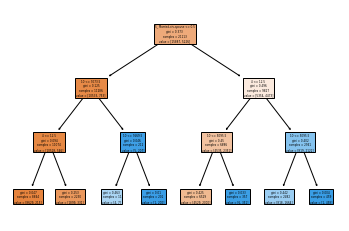

In [27]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

## 2nd Configuration

In [28]:
model = DecisionTreeClassifier(min_samples_leaf=2)

In [29]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2)

### Accuracy

> In `train` data

In [30]:
model.score(X_train, y_train)

0.9571827783829868

> In `test` data

In [31]:
model.score(X_test, y_test)

0.8197590894021439

### Model Visualization

> - `plot_tree()`

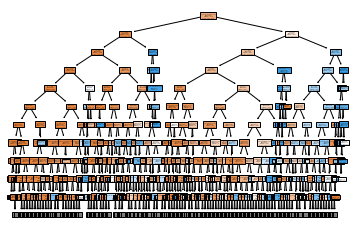

In [32]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True, max_depth=10);

## 3rd Configuration

In [33]:
model = DecisionTreeClassifier(splitter='random', min_samples_leaf=10)

In [34]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10, splitter='random')

### Accuracy

> In `train` data

In [35]:
model.score(X_train, y_train)

0.8675223795765642

> In `test` data

In [36]:
model.score(X_test, y_test)

0.8358934688915902

### Model Visualization

> - `plot_tree()`

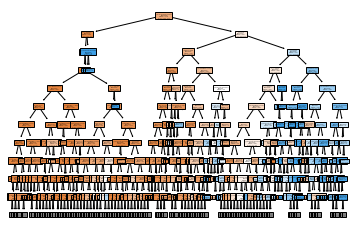

In [37]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True, max_depth=10);

## 4th Configuration

In [38]:
model = DecisionTreeClassifier(splitter='random', max_depth=3, min_samples_leaf=4, min_samples_split=6)

In [39]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=6,
                       splitter='random')

### Accuracy

> In `train` data

In [40]:
model.score(X_train, y_train)

0.8097380760668782

> In `test` data

In [41]:
model.score(X_test, y_test)

0.8087081445463588

### Model Visualization

> - `plot_tree()`

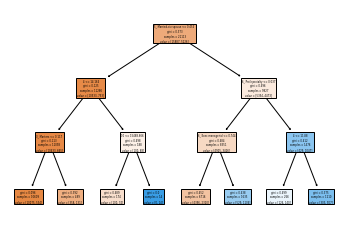

In [42]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

## 5th Configuration

In [43]:
model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=200, ccp_alpha=10, max_features=15)

In [44]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=10, max_depth=4, max_features=15,
                       min_samples_leaf=200)

### Accuracy

> In `train` data

In [45]:
model.score(X_train, y_train)

0.7524747785724435

> In `test` data

In [46]:
model.score(X_test, y_test)

0.7478174383909825

### Model Visualization

> - `plot_tree()`

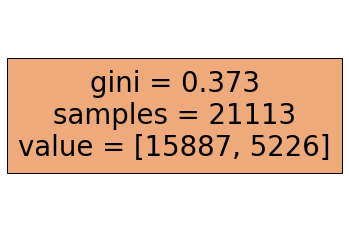

In [47]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

# `GridSearchCV()` to find Best Hyperparameters

> - How many scores for each fold?

<img src="src/grid_search_cross_validation.png" style="margin-top: 100px"/>

In [8]:
from sklearn.model_selection import GridSearchCV

In [49]:
cv = GridSearchCV(estimator=dt, param_grid={'min_samples_leaf': [50, 100, 200],
                                            'criterion': ['gini', 'entropy'],
                                           'max_depth': [5,8,11, 15]}, verbose=2)

In [52]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_leaf=200; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_sam

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 8, 11, 15],
                         'min_samples_leaf': [50, 100, 200]},
             verbose=2)

In [53]:
cv.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 100}

# Other Models

In [6]:
from sklearn.model_selection import GridSearchCV

## Support Vector Machines `SVC()`

> - https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [54]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [44]:
from sklearn.svm import SVC

In [45]:
sv = SVC()

In [46]:
sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [47]:
sv_cv = GridSearchCV(estimator=sv, param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                                            'gamma': ['scale', 'auto'],
                                           'C': [1,3,7, 15]}, verbose=2)

In [ ]:
sv_cv.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


## `KNeighborsClassifier()`

In [25]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HVXime0nQeI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knc = KNeighborsClassifier()

In [28]:
knc.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [29]:
sv_knc = GridSearchCV(estimator=knc, param_grid={'n_neighbors': [5, 10, 15],
                                            'weights': ['uniform', 'distance'],
                                           'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, verbose=2)

In [30]:
sv_knc.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .....algorithm=auto, n_neighbors=5, weights=uniform; total time=  17.3s
[CV] END .....algorithm=auto, n_neighbors=5, weights=uniform; total time=   4.7s
[CV] END .....algorithm=auto, n_neighbors=5, weights=uniform; total time=   2.9s
[CV] END .....algorithm=auto, n_neighbors=5, weights=uniform; total time=   2.6s
[CV] END .....algorithm=auto, n_neighbors=5, weights=uniform; total time=   2.7s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=   2.5s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=   2.7s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=   2.7s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=   2.5s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=   2.5s
[CV] END ....algorithm=auto, n_neighbors=10, weights=uniform; total time=   2.8s
[CV] END ....algorithm=auto, n_neighbors=10, we

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 10, 15],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [33]:
sv_knc.best_params_

{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'uniform'}

In [35]:
knc = KNeighborsClassifier(algorithm='auto', n_neighbors= 15, weights= 'uniform')

In [37]:
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [38]:
knc.score(X_test, y_test)

0.7830699524809371

# Best Model with Best Hyperparameters

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Even a model can be bettered
- [ ] The goal is to make models that perform a better accuracy on data not seen
    - The banks would like to know if a **future client** will be able to pay the loan
    - Not a past client
    - Unfortunately, we do not have data for future clients
    - So, we fix this with `Data Splitting` into
        - Train
            - Fold Validation
        - Test
- [ ] Understand the Machine Learning Applications to businesses
    - To predict if a customer will pay the loan
    - To predict if an athlete will have an injury